In [1]:
# demo de-noising using fhmm
# this was attempt 1, all is working but need to streamline so that
# it's simpler to run lots of tests

import sys
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/whale/setup/data/brydes', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [69]:
import librosa
import torchaudio
import numpy as np
import config
import os.path
import math
import os
import pathlib
import random
import torch
import utils
import warnings
import my_torch.torchio as tio
import torchaudio.functional as F
import torchaudio.transforms as T
from final.useful import *

In [75]:
def noise_file_to_audio(noise_dir, sample_rate):
    effects = [
        ['remix', '1'],  # convert to mono
        ['rate', str(sample_rate)],  # resample
        ['gain', '-n']  # normalises to 0dB
    ]
    noise, sr = torchaudio.sox_effects.apply_effects_file(noise_dir, effects, normalize=True)
    return noise, sr

def get_feature(sample, nfft):
    return np.log(np.square(np.abs(librosa.stft(sample, n_fft=nfft)).T))

In [76]:
fs = 96000
nfft = 2048

In [71]:
from whale.setup import get_data, constants, annotations
import importlib
importlib.reload(constants)

get_data_brydes = get_data.GetDataSimple(
    location_of_wav_file=constants.BRYDES_WAV_EXAMPLE,
    location_of_annotations=constants.BRYDES_LABEL_WHALE_TEST,
    fs=fs, file_to_audio=noise_file_to_audio)

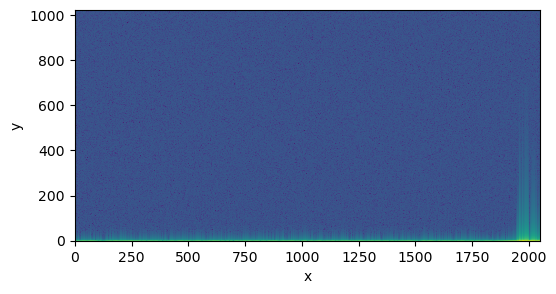

In [77]:
# brydes_audio, _ = noise_file_to_audio(get_data_brydes.location_of_wav_file, 4000)
brydes_audio_numpy = get_data_brydes.audio.numpy().flatten()

brudes_feature_example = get_feature(brydes_audio_numpy, nfft)
vis_helper(brudes_feature_example)


In [82]:
native_audio, native_fs = librosa.load(constants.BRYDES_WAV_EXAMPLE,sr=96000)


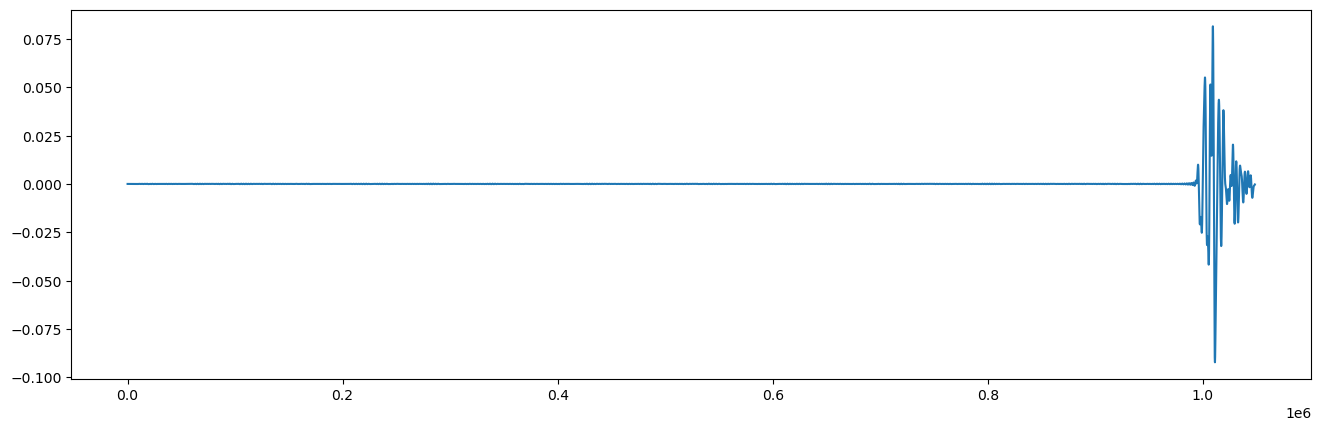

In [83]:
plt.plot(native_audio)

In [54]:
# create labels and data
brydes_samples = []
brydes_features = []
for i in range(len(get_data_brydes.annotations)):
    annot = get_data_brydes.annotations[i]
    sample = brydes_audio_numpy[annot.start:annot.end]
    brydes_samples.append(sample)
    brydes_features.append(get_feature(sample, nfft))

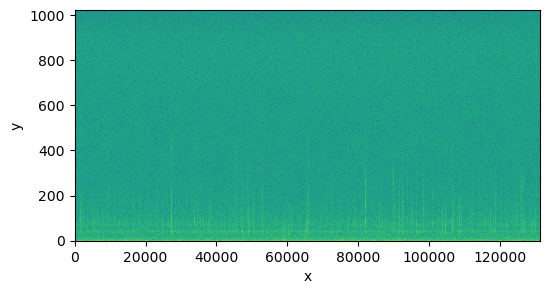

In [68]:
feature_test = get_feature(brydes_audio_numpy[0:len(brydes_audio_numpy/36)], nfft)

vis_helper(feature_test)